## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')


In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
path = '/content/drive/My Drive/data/HotelBookings.csv'

In [48]:
df = pd.read_csv(path,parse_dates=[0])

# Table of contents 

* [The Data](#the_data)
* [cleaning missing values](#missing)
* [section 1 : booking analysis]
* [How many bookings were canceled?](#bookings_canceled)
* [What percentage of hotel stays were classified as "repeat guests"?](#repeat)
* [variation in lead time of canceled and not canceled bookings](#leadtime)
* [which meal package do guests prefer ?](#meal)
* [section 2 : guest analysis]
* [total stay days insights](#stay_day)
* [total cost paid](#total_cost)
* [How much do guests pay for a room per night?](#pay_per_night)
* [How does the price per night vary over the year?](#price_over_year)
* [How long do people stay at the hotels?](#length)
* [Which are the most busy month?](#`busy)
* [what is the highest adr](#adr)
* [what is the optimal length of stay in order to get the best daily rate](#optimal)
* [predict whether or not a hotel was likely to receive a disproportionately high number of special requests?](#specialrequest)
* [is the amount paid higher than average for bookings with special requests](#specreq)
* [Is there any extra amount for parking spaces](#parkingspace)






## Understanding the Background and Data


<a id='the_data'></a>

## The Data 

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made,is the booking canceled or not,  length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [50]:
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [51]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


<a id =#missing></a>
##cleaning missing values

In [52]:
df.isnull()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119386,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119387,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119388,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


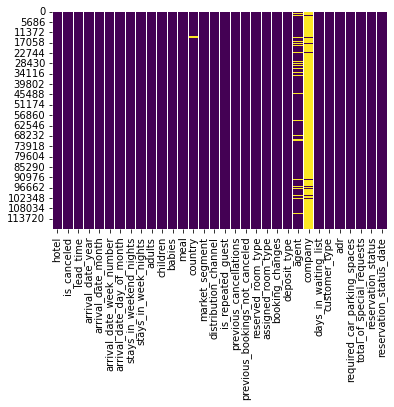

In [53]:
#sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap ='viridis')
sns.heatmap(df.isnull(),cbar=False,cmap ='viridis')

In [54]:
df= df.drop(['company'],axis=1)

#too many null values in company hence , dropping that company column

#Section 1 : bookings analysis

##How many bookings were canceled?

In [55]:
df['is_canceled'].value_counts()


0    75166
1    44224
Name: is_canceled, dtype: int64

In [56]:
df['is_canceled'].value_counts()[1]/len(df)*100

37.041628277075134

44,224  ie. 37% of all bookings were canceled

In [57]:
canceled_bookings  =  df[df['is_canceled']==1]

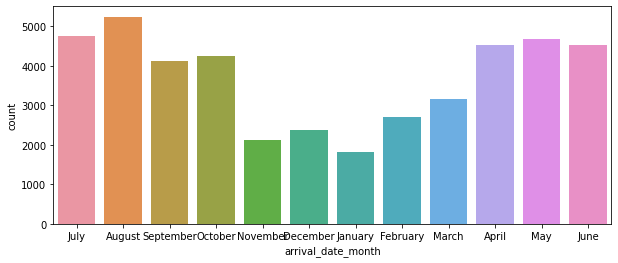

In [58]:
plt.figure(figsize=(10,4))
sns.countplot(data=canceled_bookings,x='arrival_date_month')



###observation: august month had the highest cancellations

##Q.What percentage of hotel stays were classified as "repeat guests"?

In [59]:
np.round(100 * sum(df['is_repeated_guest'] == 1) / len(df),2)

 

3.19

## variation in lead time of canceled and not canceled bookings

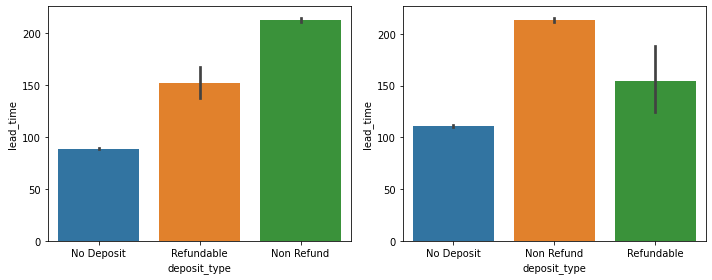

In [60]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
sns.barplot(ax = axes[0],y= df['lead_time'],x=df['deposit_type'])
sns.barplot(ax=axes[1],y=canceled_bookings['lead_time'],x=canceled_bookings['deposit_type'])

plt.tight_layout()

### short term bookings( <100 days) are no deposit bookings 
### in the canceled bookings the lead time is highest at 200 days for non refund deposit type 


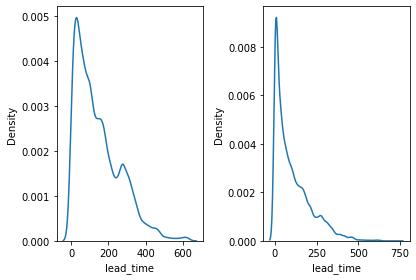

In [61]:
fig,axes = plt.subplots(nrows=1,ncols=2)
sns.kdeplot(ax = axes[0],x= canceled_bookings['lead_time'])
sns.kdeplot(ax=axes[1],x =df['lead_time'])

plt.tight_layout()

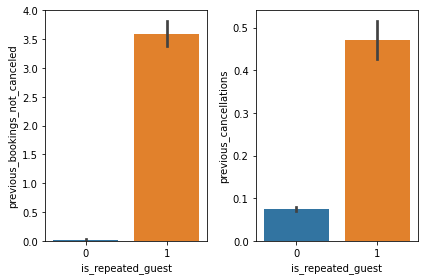

In [62]:
fig,axes = plt.subplots(nrows=1,ncols=2)
sns.barplot(ax = axes[0],x= df['is_repeated_guest'],y=df['previous_bookings_not_canceled'])
sns.barplot(ax = axes[1],x= df['is_repeated_guest'],y=df['previous_cancellations'])

plt.tight_layout()

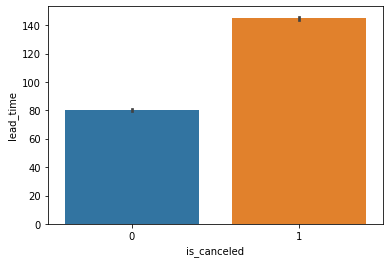

In [63]:
sns.barplot(x= df['is_canceled'],y=df['lead_time'])


## which meal package do guests prefer  ?




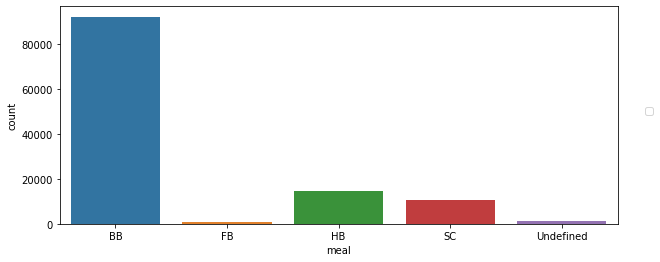

In [64]:
plt.figure(figsize=(10,4))
sns.countplot(data=df,x='meal')

plt.legend(loc=(1.05,0.5))

### observation: people prefer the BB package

## what is the average no. of days  in waiting list

In [65]:
df['days_in_waiting_list'].mean()

2.321149174972778

(0.0, 500.0)

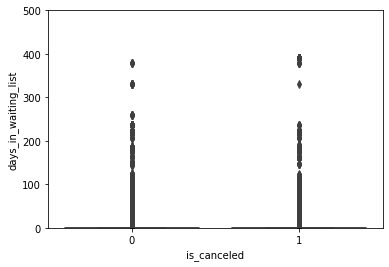

In [66]:
sns.boxplot(data=df,y='days_in_waiting_list',x='is_canceled')
plt.ylim(0,500)

# section2 : guest analysis

##total stay days insights

In [67]:
df['total_stay_days'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

np.round(df['total_stay_days'].mean(),2)

3.43

###observation: 3.4 days is the average stay duration

##relation between parents,children and babies INSIGHTS

In [68]:
new_df1 = df[(df['children']==0) & (df['babies']==0)]
a = len(new_df1)
new_df2 = df[(df['children']>0) & (df['babies']==0)]
b = len(new_df2)
new_df3 = df[(df['children']>0) & (df['babies']>0)]
c = len(new_df3)
print(a,b,c)


110054 8415 175


In [69]:
new_df3['hotel'].value_counts() # this is the only group that prefers resort hotel over city hotel

Resort Hotel    103
City Hotel       72
Name: hotel, dtype: int64

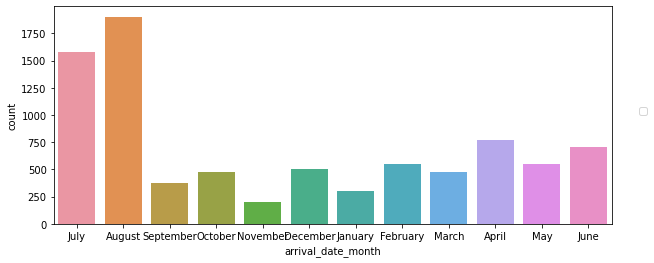

In [70]:
plt.figure(figsize=(10,4))
sns.countplot(data=new_df2,x='arrival_date_month')

plt.legend(loc=(1.05,0.5))

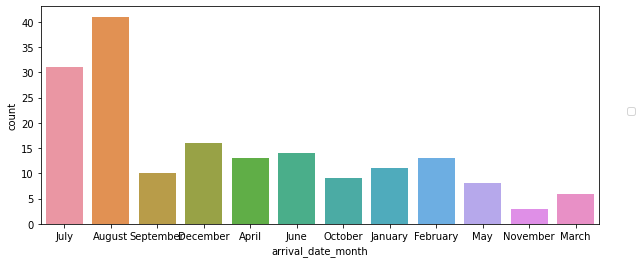

In [71]:
plt.figure(figsize=(10,4))
sns.countplot(data=new_df3,x='arrival_date_month')

plt.legend(loc=(1.05,0.5))

### observation :clearly august and july is the peak booking season for  adults with children and babies

##total cost paid 

In [72]:
df['total_paid'] = df['adr'] * df['total_stay_days']
np.round(df['total_paid'].mean(),2)

357.85

###observation: 357.85 is the average booking amount for entire stay

##How much do guests pay for a room per night?

In [73]:
df['cost_per_night']  = df['total_paid'] / df['total_stay_days']

In [74]:
df['cost_per_night'].mean()

102.44463956182851

### observation : the avg cost per night for a booking  is 102.4

##How does the price per night vary over the year?

In [75]:
meanprice_permonth=df.groupby(['arrival_date_month'])['cost_per_night'].mean().reset_index()
meanprice_permonth

,arrival_date_month,cost_per_night
0,April,100.725960
1,August,140.628352
2,December,82.106130
3,February,74.142850
4,January,70.995882
5,July,127.391717
6,June,117.121878
7,March,81.227020
8,May,109.428691
9,November,74.574293


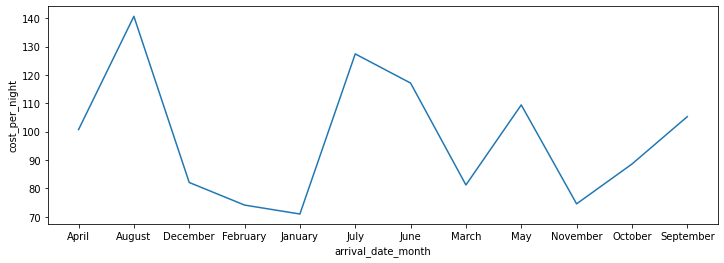

In [76]:
plt.figure(figsize=(12,4))
sns.lineplot(data=meanprice_permonth,x='arrival_date_month',y='cost_per_night')



In [77]:
meanprice_permonth.max()[0]

'September'

In [78]:
meanprice_permonth.min()

arrival_date_month        April
cost_per_night        70.995882
dtype: object

###observation : the month with highest avg cost_per_night is august and the lowest adr is january

## How long do people stay at the hotels?


In [79]:
df['total_stay_days'].mean()

3.4279001591423066

In [80]:
df['total_stay_days'].max()

69

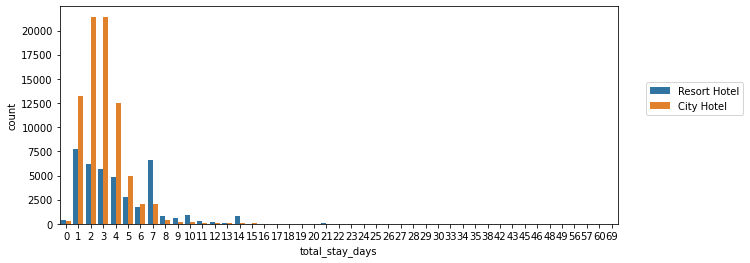

In [81]:
plt.figure(figsize=(10,4))
sns.countplot(data=df,x='total_stay_days',hue='hotel')

plt.legend(loc=(1.05,0.5))

##Which are the most busy month?

In [82]:
df['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

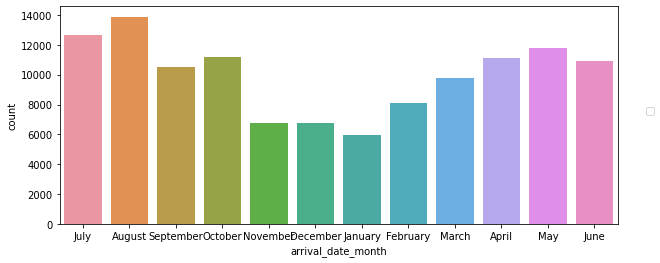

In [83]:
plt.figure(figsize=(10,4))
sns.countplot(data=df,x='arrival_date_month')

plt.legend(loc=(1.05,0.5))

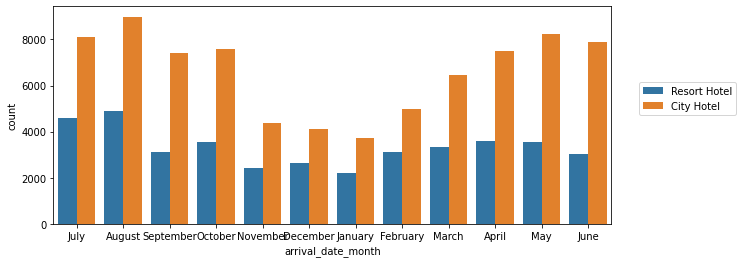

In [84]:
plt.figure(figsize=(10,4))
sns.countplot(data=df,x='arrival_date_month',hue='hotel')

plt.legend(loc=(1.05,0.5))

###observation : august is the busiest month
### january and december,november is the dull booking season

##most common country of origin

In [85]:
df['country'].value_counts()[:5]

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
Name: country, dtype: int64

### PRT portugal is the most common country of origin for guests

##what is the highest adr 

In [86]:
df.sort_values('adr',ascending=False)['adr'].iloc[0]

5400.0

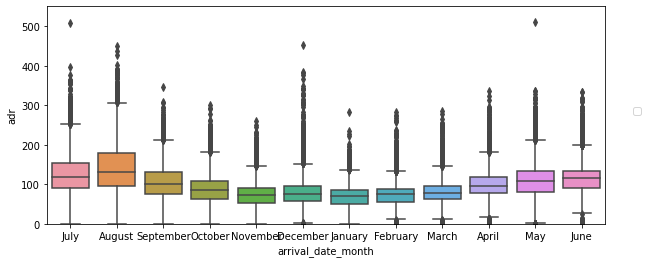

In [87]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df,x='arrival_date_month',y='adr')
plt.ylim(0,550)

plt.legend(loc=(1.05,0.5))
#november to feb is ideal for budget booking travellers

### observation:  august is the month with the highest adr
### there is a lot of outliers of amt paid in every month 

In [88]:
#mean of adr 
round(new_df3['adr'].mean(),2) 

152.1

In [89]:
round(df['adr'].mean(),2)

101.83

###the mean adr is 101.8 and 152 for adults with kids  and the highest adr of 5400 is an outlier

##Q. what is the optimal length of stay in order to get the best daily rate


In [90]:
rel_df =  df[df['adr']>0]
rel_df.sort_values(['adr','total_stay_days'],ascending=[True,False])[:5]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay_days,total_paid,cost_per_night
35059,Resort Hotel,0,80,2017,March,10,5,12,26,2,...,0,Transient-Party,0.26,0,0,Check-Out,2017-04-12,38,9.88,0.26
47427,City Hotel,1,37,2016,February,8,20,4,8,1,...,0,Transient,0.50,0,0,Canceled,2016-01-18,12,6.00,0.50
83688,City Hotel,0,59,2016,February,6,6,2,2,1,...,0,Transient-Party,1.00,0,0,Check-Out,2016-02-10,4,4.00,1.00
83690,City Hotel,0,59,2016,February,6,6,2,2,1,...,0,Transient-Party,1.00,0,0,Check-Out,2016-02-10,4,4.00,1.00
83697,City Hotel,0,59,2016,February,6,6,2,2,1,...,0,Transient-Party,1.00,0,0,Check-Out,2016-02-10,4,4.00,1.00


In [91]:
rel_df.sort_values(['adr','total_stay_days'],ascending=[True,False])[:4]['total_stay_days'].mean()

14.5

(0.0, 1000.0)

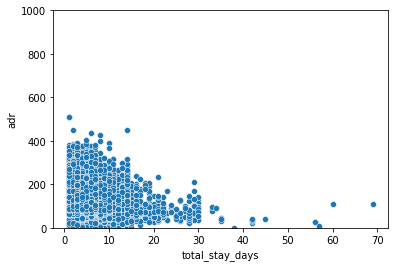

In [92]:
sns.scatterplot(y= rel_df['adr'],x=rel_df['total_stay_days'])
plt.ylim(0,1000)

### Observation: 38 days gets the best adr 
### 14.5days stay to get top 4 'adr' values
### 12.4days stay to get top 5 'adr' values



##Q. predict whether or not a hotel was likely to receive a disproportionately high number of special requests?

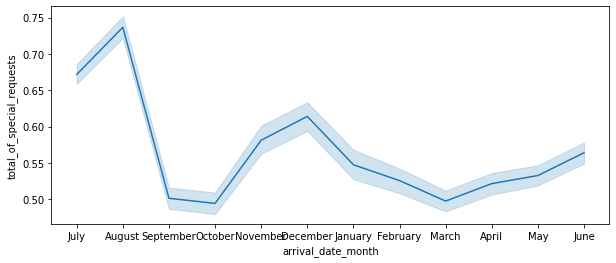

In [93]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df,x='arrival_date_month',y='total_of_special_requests')


###observation : hotels in august recieve a alot of special requests

## Q. is the amount paid higher than average for bookings with special requests 

In [94]:
df_special = df[df['total_of_special_requests']>0]
df_nospecial = df[df['total_of_special_requests']==0]

In [95]:
df_nospecial['adr'].mean()

94.96161110953099

In [96]:
df_special[df_special['total_of_special_requests']==5]['adr'].mean()


127.74650000000001

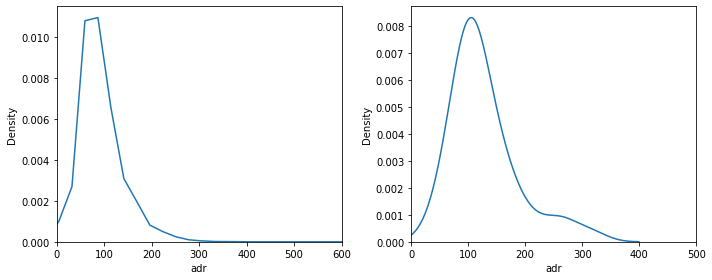

In [97]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(10,4))

sns.kdeplot(ax=axes[0],x=df_nospecial['adr'])
sns.kdeplot(ax=axes[1],x=df_special[df_special['total_of_special_requests']==5]['adr'])
axes[1].set_xlim(0,500)
axes[0].set_xlim(0,600)
plt.tight_layout()

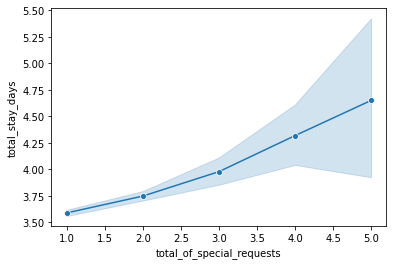

In [98]:
sns.lineplot(x= df_special['total_of_special_requests'],y=df['total_stay_days'],marker='o')


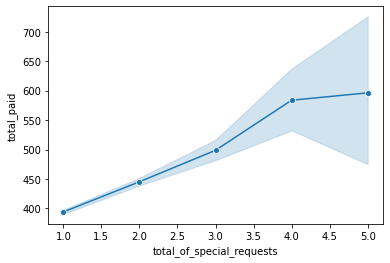

In [99]:
sns.lineplot(x= df_special['total_of_special_requests'],y=df['total_paid'],marker='o')


###observation: the average  adr for special_requests is higher that without special requests
### the special requests increase as the total stay days increases
### the total paid increases with the no. of special requests

## Q. Is there any extra amount for parking spaces

In [100]:
df[df['required_car_parking_spaces']==8]['adr']



29045    40.0
29046    80.0
Name: adr, dtype: float64

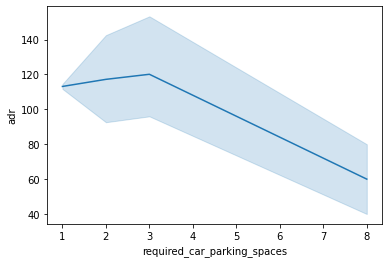

In [101]:
df_parking = df[df['required_car_parking_spaces']>0]
sns.lineplot(x=df_parking['required_car_parking_spaces'],y=df_parking['adr'])


### the adr is decreases which suggests no extra money for more parking spaces 